In [32]:
#########################################
# ANN on MNIST Number Dataset
# By Giriraj Vaishnav
#########################################

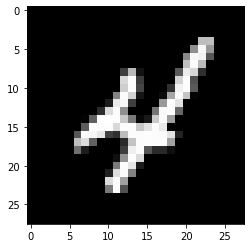

In [33]:
# Loading the MNIST Dataset

from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train,y_train), (X_test, y_test)= mnist.load_data()
plt.subplot()
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

In [34]:
# Importing necessary libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

In [35]:
# Reshape the Data

number_pix=X_train.shape[1]*X_train.shape[2] 
X_train=X_train.reshape(X_train.shape[0], number_pix).astype('float32')
X_test=X_test.reshape(X_test.shape[0], number_pix).astype('float32')

In [36]:
# Normalize the data

X_train=X_train/255
X_test=X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [37]:
# Training the ANN model

model=Sequential()
model.add(Dense(number_pix, input_dim=number_pix, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
H = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 5s - loss: 0.2758 - accuracy: 0.9224 - val_loss: 0.1346 - val_accuracy: 0.9606
Epoch 2/10
300/300 - 4s - loss: 0.1120 - accuracy: 0.9678 - val_loss: 0.0906 - val_accuracy: 0.9733
Epoch 3/10
300/300 - 4s - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.0839 - val_accuracy: 0.9749
Epoch 4/10
300/300 - 4s - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0677 - val_accuracy: 0.9799
Epoch 5/10
300/300 - 4s - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0671 - val_accuracy: 0.9790
Epoch 6/10
300/300 - 4s - loss: 0.0264 - accuracy: 0.9932 - val_loss: 0.0634 - val_accuracy: 0.9802
Epoch 7/10
300/300 - 4s - loss: 0.0200 - accuracy: 0.9950 - val_loss: 0.0670 - val_accuracy: 0.9804
Epoch 8/10
300/300 - 4s - loss: 0.0148 - accuracy: 0.9965 - val_loss: 0.0610 - val_accuracy: 0.9829
Epoch 9/10
300/300 - 4s - loss: 0.0120 - accuracy: 0.9972 - val_loss: 0.0631 - val_accuracy: 0.9799
Epoch 10/10
300/300 - 4s - loss: 0.0084 - accuracy: 0.9983 - val_loss: 0.0597 - val_accuracy: 0.9813

In [38]:
# Evaluating the model

score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 1.87%


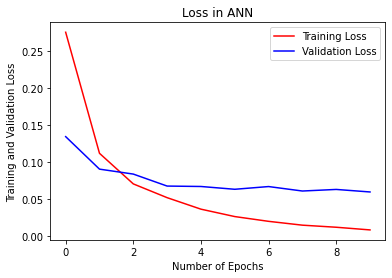

In [39]:
# Ploting the graph for Training and Validation Loss

from matplotlib import pyplot as plt
plt.plot(range(0,10), H.history["loss"], "r", label = "Training Loss")
plt.plot(range(0,10), H.history["val_loss"], "b", label = "Validation Loss")
plt.title("Loss in ANN")
plt.legend(loc = "upper right")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.show()

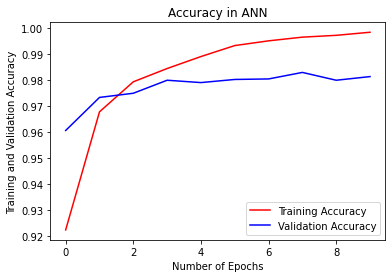

In [40]:
# Ploting the graph for Training and Validation Accuracy

from matplotlib import pyplot as plt
plt.plot(range(0,10), H.history["accuracy"], "r", label = "Training Accuracy")
plt.plot(range(0,10), H.history["val_accuracy"], "b", label = "Validation Accuracy")
plt.title("Accuracy in ANN")
plt.legend(loc = "lower right")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Accuracy")
plt.show()

In [41]:
# Predicting the Test Set

pred_labels = model.predict_classes(X_test)
print(pred_labels)
test_label = np.argmax(y_test, axis=1)
print(test_label)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [42]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_label, pred_labels)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 972    1    0    1    1    0    1    1    3    0]
 [   0 1129    1    2    0    1    2    0    0    0]
 [   5    3 1004    2    2    0    2    5    8    1]
 [   0    0    2  997    0    1    0    2    3    5]
 [   1    2    2    1  967    0    3    1    1    4]
 [   2    0    0   11    1  866    1    1    6    4]
 [   5    2    3    1    3    3  941    0    0    0]
 [   1    7    7    2    1    0    0 1000    2    8]
 [   2    1    3    3    0    2    1    3  956    3]
 [   3    4    0    4    7    2    0    5    3  981]]


In [43]:
# Classification report for precision, recall f1-score and accuracy

from sklearn.metrics import classification_report

report = classification_report(test_label,pred_labels)
print('Classification report : \n',report)

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

